# APIS

> Working with APIS
- template: template_article
- sitemap: dataplay
- csp: img-src 'self' https://charleskarpati.com/ data: https://raw.githubusercontent.com/ https://static.mybinder.org/ https://mybinder.org/ https://pete88b.github.io/ https://badges.frapsoft.com/ https://img.shields.io/ http://img.shields.io/; connect-src 'self';

The darker boxes of text are code.

If you click on one: hit `shft` + `entr` to execute the cell's code.

In [1]:
# This is a comment! You can tell by the way it's green and starts with a `#` 
print('This line of code prints out the red text inside of it')

# and here I store a variable called 'hi' and then print that too.
my_test_variable = 'hi'
print(my_test_variable)

This line of code prints out the red text inside of it
hi


Follow along as we run the rest one by one?

This next line will install geopandas. It is the only library not pre-provided by COLABS

Pip is a tool colabs provides to install python libraries onto the [virtual machine](https://en.wikipedia.org/wiki/Virtual_machine) they provide us. 

We use it's [**command line**](https://en.wikipedia.org/wiki/Unix_shell) API here:


In [2]:
!pip install geopandas

You may have seen a lot stuff it `output`...

Feel free to hit the X button in the left of the cell (when hovering over) to delete it.

Now the virtual machine has our needed library. 

With that done, formally 'import' the library into our **python** runtime enviornment so we may use it.

In [3]:
import geopandas

This next part is a little bit hard.

Hit [this](https://github.com/Colinstarger/Black-Butterfly-BNIA/blob/master/VS-Indicator-APIs.csv) link. Find a statistic you'd like to visualize. Copy and paste its `shortname` into the code cell below.

In [4]:
shortname = 'libcard'

Lets see our final query?

In [10]:
# Create the url we will use to query the data from the ESRI api endpoint.
baseurl = "https://services1.arcgis.com/mVFRs7NF4iFitgbY/ArcGIS/rest/services/"
slug = "/FeatureServer/0/query?where=1%3D1&outFields=*&returnGeometry=true&f=pgeojson"
url = baseurl+shortname+slug 

In [11]:
print(url)

https://services1.arcgis.com/mVFRs7NF4iFitgbY/ArcGIS/rest/services/libcard/FeatureServer/0/query?where=1%3D1&outFields=*&returnGeometry=true&f=pgeojson


And were all set!

For a simple pull of our data, just run the next cell!

In [15]:
# Use the geopandas library to read it in and immediately set it's index and drop an undesired column.
gdf = geopandas.read_file(url).set_index('CSA2010').drop(axis='1', columns=['OBJECTID','Shape__Area','Shape__Length'])

Lets see it?

Right of the bat, we can use two different libraries to get dramatically different results:

In [18]:
# Change the number here to get a different number of rows
# gdf.head(2)
gdf.tail(4) 
# this works too! just uncomment it

,libcard11,libcard12,libcard13,libcard14,libcard15,libcard16,libcard17,libcard18,libcard19,geometry
CSA2010,,,,,,,,,,
The Waverlies,358.957823,345.672643,270.346962,447.826648,504.449890,458.274216,403.714691,405.004514,400.490133,"POLYGON ((-76.59550 39.33416, -76.59548 39.334..."
Upton/Druid Heights,293.656933,285.341327,253.142526,426.513247,465.673951,382.517888,315.993038,316.863276,310.674918,"POLYGON ((-76.63401 39.31045, -76.62509 39.303..."
Washington Village/Pigtown,318.916954,301.835363,271.669998,422.496820,446.302017,370.343449,319.280393,329.820098,331.092132,"POLYGON ((-76.62096 39.27466, -76.62110 39.274..."
Westport/Mount Winans/Lakeland,155.499368,149.318725,133.445709,246.382919,267.734232,229.526619,181.345695,185.981177,176.288805,"POLYGON ((-76.62627 39.26790, -76.62631 39.267..."


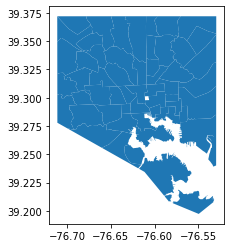

In [19]:
gdf.plot()

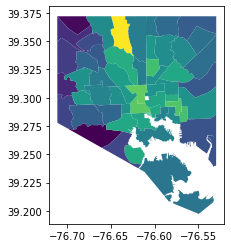

In [21]:
gdf.plot(column='libcard11')

Use the `plot function to see a map! 

Geopandas provides a convenient [webpage](https://geopandas.org/docs/user_guide/mapping.html) to help you get really pretty results in not time!

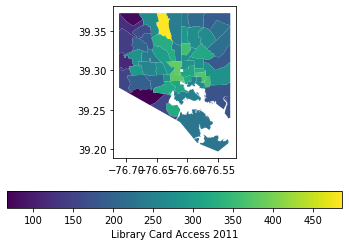

In [23]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
gdf.plot(column='libcard11', ax=ax, legend=True, 
           legend_kwds={'label': "Library Card Access 2011", 'orientation': "horizontal"})

Awesome!

If you want to save the data you may use this `csv` library.

In [ ]:
import csv
gdf.drop(axis='1', columns=['geometry']).to_csv(shortname+'.csv', quoting=csv.QUOTE_ALL) 

A full, unedited list of our available endpoints may be found [here](https://services1.arcgis.com/mVFRs7NF4iFitgbY/ArcGIS/rest/services/) 

You can also click this [link](https://services1.arcgis.com/mVFRs7NF4iFitgbY/ArcGIS/rest/services/), find the service and or layer you want to query; and there will be a little 'query' button in the bottom left which will take you to an advanced GUI to help you generate custom queries.

example: 
https://services1.arcgis.com/mVFRs7NF4iFitgbY/ArcGIS/rest/services/Aastud/FeatureServer/query

NOW!

If we want to change our visualization of the data.

We can use the underlying library used by geopandas itself: matplotlib, and seaborn.

Geojson data does not play nicely with these kind of maps. so we will drop it "for now."

In [25]:
df = gdf.drop(axis='1', columns=['geometry'])

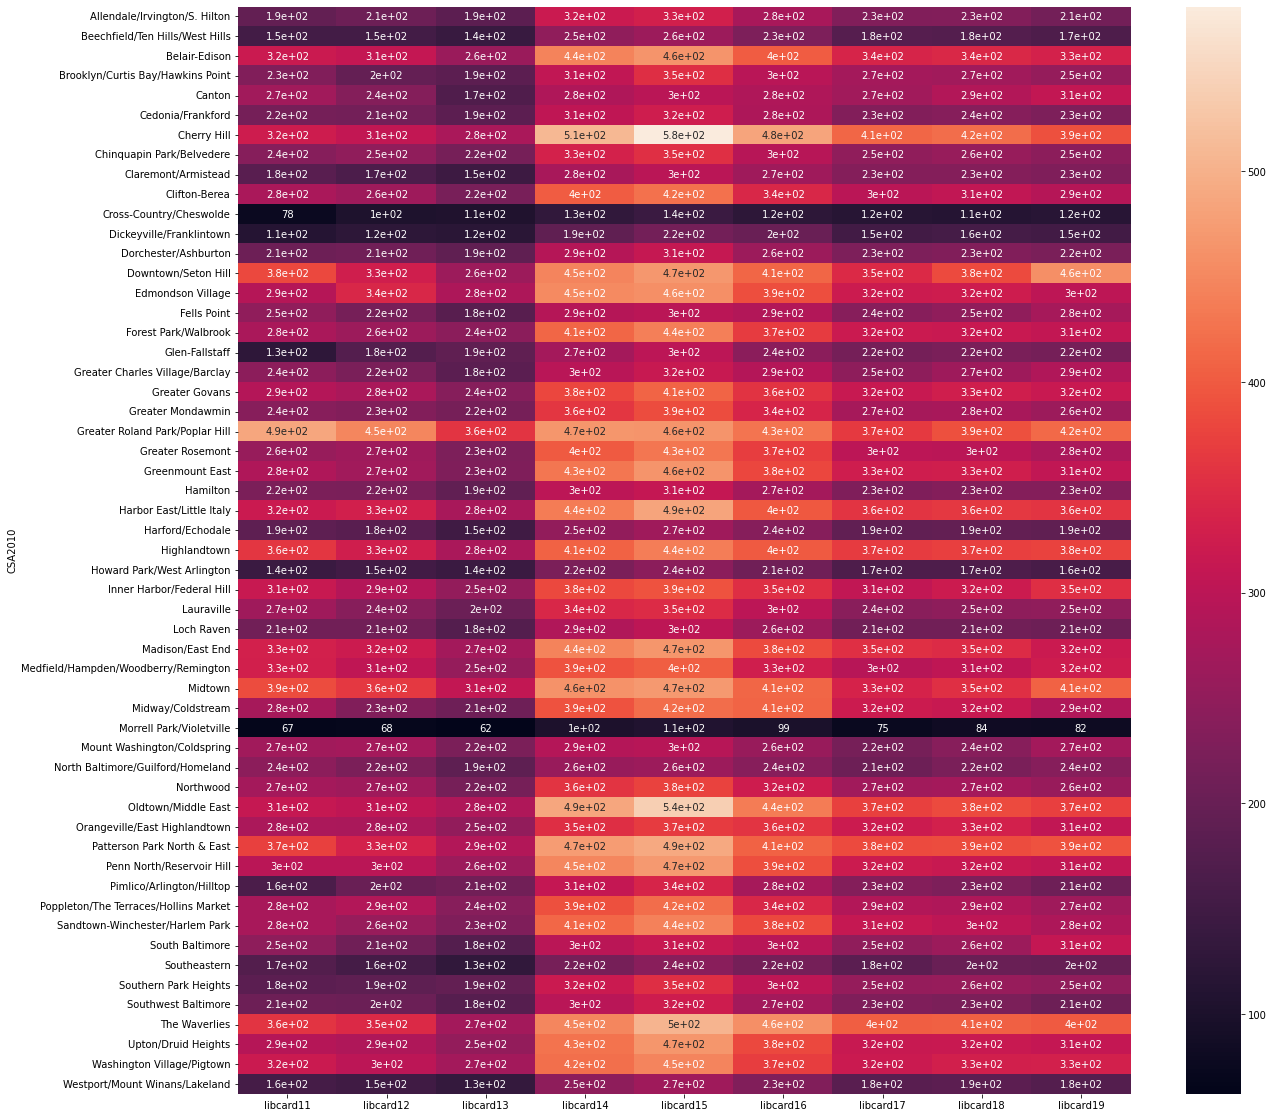

In [29]:
import numpy as np 
from pandas import DataFrame
import seaborn as sns
%matplotlib inline
# We can change the size of our images like this:
plt.figure(figsize=(20,20))

# And heatmaps are as simple as this:
sns.heatmap(df, annot=True)

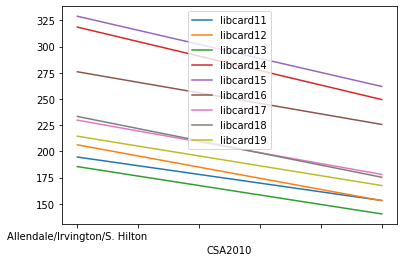

In [31]:
df.head(2).plot.line()

But these look a bit aweful.

A full list of visualizations you may use with the seaborn and matplotlib libraries can be found on each of their corresponding websites.

- [pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.line.html)
- [geopandas](https://geopandas.org/docs/user_guide/mapping.html)
- [seaborn](https://seaborn.pydata.org/generated/seaborn.lineplot.html#seaborn.lineplot) 
- [matplotlib](https://matplotlib.org/stable/gallery/lines_bars_and_markers/lines_with_ticks_demo.html#sphx-glr-gallery-lines-bars-and-markers-lines-with-ticks-demo-py)

What will you do?

We may use the remainder of our time today to explore some of these libraries, API's and most importantly 

UNDERSTANDING THEIR DOCUMENTATION USING THE LINKS ABOVE.

The rest of this doc is a playground: